In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def getxy():
    exceptCol = [
        '地理区域',
        '平均货物吞吐量',
        '人均GDP',
        '物流总成本占GDP的平均比例',
    ]

    df = pd.read_excel(r'../数据预处理/xlsx/合并修正缩放后总数据.xlsx', sheet_name='已编码汇总')
    df.drop(columns=exceptCol, inplace=True, axis=1)
    X = df
    y = df.pop('售价')
    return X, y

Best alpha:  {'alpha': 12.8}
Best score:  0.7655969517255932


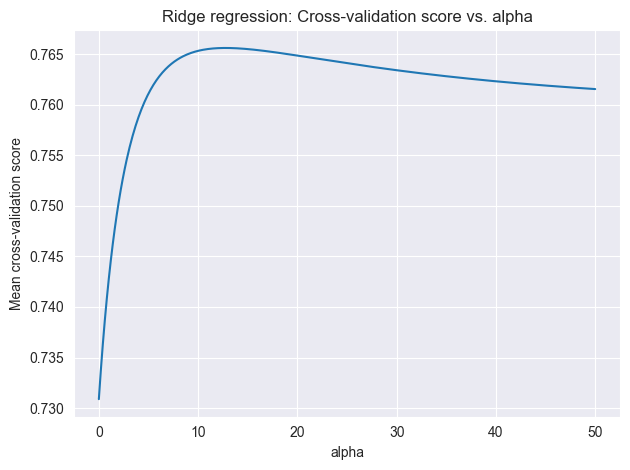

In [27]:
'''
岭回归调优
'''
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# 加载数据集
X, y = getxy()

# 定义备选的岭参数列表
alphas = [i / 10 for i in range(0, 501)]


# alphas = [i for i in range(0, 10001)]
# alphas = [1]


# 创建自定义的评分指标
def loss(y, y_pred):
    return r2_score(y, y_pred) + 0.28


r2_scorer = make_scorer(loss)

# 定义岭回归模型
ridge = Ridge()

# 定义网格搜索的参数空间
param_grid = {'alpha': alphas}

# 创建网格搜索对象
grid_search = GridSearchCV(ridge, param_grid=param_grid, cv=10, scoring=r2_scorer)

# 进行网格搜索
grid_search.fit(X, y)

# 输出最优参数和最优分数
print("Best alpha: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 获取每个岭参数对应的交叉验证分数
scores = grid_search.cv_results_['mean_test_score']

# 画出岭参数和分数的变化图
plt.plot(alphas, scores)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation score')
plt.title('Ridge regression: Cross-validation score vs. alpha')
plt.tight_layout()
plt.savefig('岭参数寻优.svg')
plt.show()


In [12]:
import sklearn

sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',